<a href="https://colab.research.google.com/github/tikendraw/Deeplearning/blob/main/DL_CNN_Model_Pizza_vs_Steak/Pizza_and_Steak_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN
## We will be building CNN model to classify between steaks and Pizza

In [2]:
# getiing the Image Dataset
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Extract the zip
import zipfile

zip = zipfile.ZipFile('pizza_steak.zip')
zip.extractall()
zip.close()

--2022-07-10 17:08:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 172.253.118.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   260MB/s    in 0.4s    

2022-07-10 17:08:49 (260 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Walkthrough the Folder

In [3]:
import os

for dirpath, folders, contents in os.walk('pizza_steak'):
    print(f'{dirpath} contain {len(folders)} folders and {len(contents)} images')

pizza_steak contain 2 folders and 0 images
pizza_steak/test contain 2 folders and 0 images
pizza_steak/test/pizza contain 0 folders and 250 images
pizza_steak/test/steak contain 0 folders and 250 images
pizza_steak/train contain 2 folders and 0 images
pizza_steak/train/pizza contain 0 folders and 750 images
pizza_steak/train/steak contain 0 folders and 750 images


In [4]:
# Getting Class names
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

main_path = pathlib.Path('pizza_steak/train/')
class_names = np.array(sorted([item.name for item in main_path.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

## Visualizing the Data

In [5]:
def show_random_image(path , class_name):

    """
    Function return a Sample image from given path and class name and plots it

    """
    if not path.endswith('/'):
        path = path + '/'
    else :
        pass

    full_path = path + class_name + '/'

    # Sample a image from path
    sample_image = random.sample(os.listdir(full_path), 1)
    image_path = full_path + sample_image[0]
    # print(full_path)
    # print(image_path)

    #reading the image
    image = mpimg.imread(image_path)

    # Plotting the image
    plt.imshow(image)
    plt.title(f'{class_name}  shape: {image.shape}')
    plt.axis(False)

    # return image

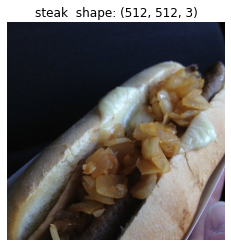

In [6]:
show_random_image( 'pizza_steak/train', 'steak')

# Proprocessing the DAta using ImageDataGenerator

In [7]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# set Seed
tf.random.set_seed(42)

# Creatin datagen Instances
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# setting directory varibles
train_dir = 'pizza_steak/train'
valid_dir = 'pizza_steak/test'

# Loading the data from directory
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 64,
                                               target_size = (244,244),
                                               class_mode = 'binary',
                                               seed = 42)

valid_data = train_datagen.flow_from_directory(directory = valid_dir,
                                               batch_size = 64,
                                               target_size = (244,244),
                                               class_mode = 'binary',
                                               seed = 42)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


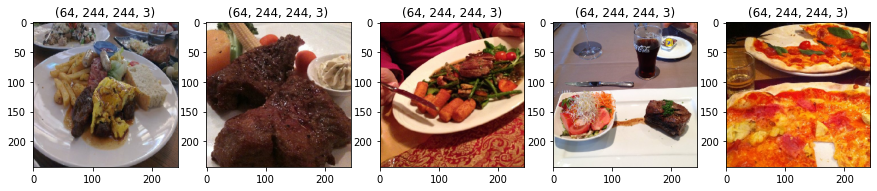

In [9]:
plt.figure(figsize  = (15,8))
for i in range(5):
    plt.subplot(1,5, i+1)
    img, label = train_data.next()
    plt.title(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
plt.show()

# Making CNN Model

In [22]:
# Creating CNN
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten


model = keras.models.Sequential([
                                Conv2D(filters = 5, kernel_size = 3, activation = 'relu', input_shape = (244,244,3)),
                                MaxPool2D( pool_size = 2, padding = 'valid'),
                                 
                                Conv2D(filters = 5, kernel_size = 3, activation = 'relu', input_shape = (244,244,3)),
                                MaxPool2D( pool_size = 2, padding = 'valid'),
                                 
                                Conv2D(filters = 5, kernel_size = 3, activation = 'relu', input_shape = (244,244,3)),
                                MaxPool2D( pool_size = 2, padding = 'valid'),
                                 
                                Flatten(),
                                # Dense(20, activation = 'relu'),
                                # Dense(10, activation = 'relu'),
                                Dense(1, activation  =  'sigmoid')
         
])

#setting Metrics
recall = tf.metrics.Recall()
precision = tf.metrics.Precision()

# Compiling
model.compile( optimizer= tf.keras.optimizers.Adam(),
              loss = keras.losses.BinaryCrossentropy(),
              metrics = ['Accuracy', recall, precision])

# Fitting the Model

history = model.fit( train_data, 
                    epochs = 20, 
                    steps_per_epoch=len(train_data), 
                    validation_data = valid_data, 
                    validation_steps = len(valid_data))

Epoch 1/20
24/24 [==============================] - 10s 402ms/step - loss: 0.6847 - Accuracy: 0.5460 - recall_2: 0.2093 - precision_2: 0.6408 - val_loss: 0.6562 - val_Accuracy: 0.6860 - val_recall_2: 0.4360 - val_precision_2: 0.8720
Epoch 2/20
24/24 [==============================] - 9s 373ms/step - loss: 0.5930 - Accuracy: 0.6993 - recall_2: 0.6067 - precision_2: 0.7447 - val_loss: 0.5491 - val_Accuracy: 0.6980 - val_recall_2: 0.9440 - val_precision_2: 0.6327
Epoch 3/20
24/24 [==============================] - 9s 369ms/step - loss: 0.5184 - Accuracy: 0.7413 - recall_2: 0.7360 - precision_2: 0.7439 - val_loss: 0.4155 - val_Accuracy: 0.8280 - val_recall_2: 0.7760 - val_precision_2: 0.8661
Epoch 4/20
24/24 [==============================] - 9s 369ms/step - loss: 0.4319 - Accuracy: 0.8100 - recall_2: 0.7893 - precision_2: 0.8234 - val_loss: 0.3722 - val_Accuracy: 0.8460 - val_recall_2: 0.8720 - val_precision_2: 0.8289
Epoch 5/20
24/24 [==============================] - 9s 379ms/step - los

In [23]:
import pandas as pd
from datetime import datetime as dt

data = pd.DataFrame(history.history)
data.head()

,loss,Accuracy,recall_2,precision_2,val_loss,val_Accuracy,val_recall_2,val_precision_2
0,0.684699,0.546000,0.209333,0.640816,0.656215,0.686,0.436,0.872000
1,0.593048,0.699333,0.606667,0.744681,0.549122,0.698,0.944,0.632708
2,0.518390,0.741333,0.736000,0.743935,0.415518,0.828,0.776,0.866071
3,0.431884,0.810000,0.789333,0.823366,0.372225,0.846,0.872,0.828897
4,0.402983,0.822000,0.802667,0.834951,0.347224,0.860,0.892,0.838346


# Plotting Model Performance


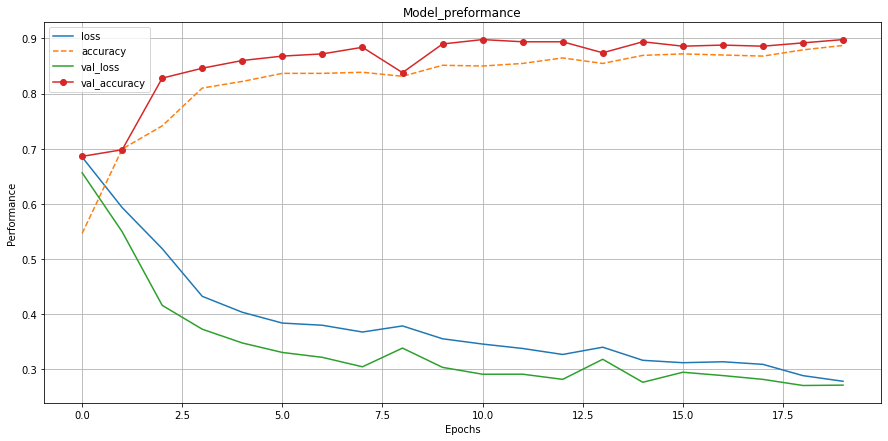

In [24]:
# Plotting Model Performance
plt.figure(figsize=(15,7))
plt.grid(True)

plt.plot(data.loss, label = 'loss')
plt.plot(data.Accuracy ,linestyle = 'dashed' ,label = 'accuracy')
# plt.plot(data.precision_1, label = 'precision')
# plt.plot(data.recall_1 ,linestyle = 'dashed' ,label = 'recall')

plt.plot(data.val_loss, label = 'val_loss')
plt.plot(data.val_Accuracy, marker = 'o', label = 'val_accuracy')
# plt.plot(data.val_precision_1, label = 'val_precision')
# plt.plot(data.val_recall_1, marker = 'o', label = 'val_recall')

plt.legend()
plt.title('Model_preformance')
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.savefig(f'Model_preformance_{dt.now()}.jpg')